<a href="https://colab.research.google.com/github/d4rkl0rd3r3b05/AI_ML/blob/main/PyTorch_Practice_Non_Linear_MultiClass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing all the libs

In [ ]:
import torch
from torch import nn
from torch import optim


import matplotlib.pyplot as plt
from pathlib import Path

import requests

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

## Device agonistic code

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Making Sample Data

In [ ]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=42)

# transforming to tensor and moving to device

X, y = torch.tensor(X, dtype=torch.float32).to(device), torch.tensor(y, dtype=torch.long).to(device)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =42, shuffle = True)

## Importing Classifier Plotter

In [ ]:
if Path("classification_plotter.py").is_file():
  print("file already existing, not re-downloading")
else:
  print("Downloading Plotter")
  data = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("classification_plotter.py", "wb") as file:
    file.write(data.content)

from classification_plotter import plot_decision_boundary

file already existing, not re-downloading


## Define model class

In [ ]:
class Classifier(nn.Module):
  def __init__(self, input_features, output_features, hidden_nodes=8):
    super().__init__()
    self.layer = nn.Sequential(nn.Linear(input_features, hidden_nodes),
                               nn.ReLU(),
                               nn.Linear(hidden_nodes, hidden_nodes),
                               nn.ReLU(),
                               nn.Linear(hidden_nodes, output_features))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer(x)

classifier = Classifier(2, 4)

## Plot function classifier regions

In [ ]:
def plot_classifier(features: torch.Tensor, category: torch.Tensor):
  plt.figure(figsize=(7, 7))

  plot_decision_boundary(classifier, features, category)

  plt.legend()

  plt.show()

## Initial Classification Plotting wihout any training

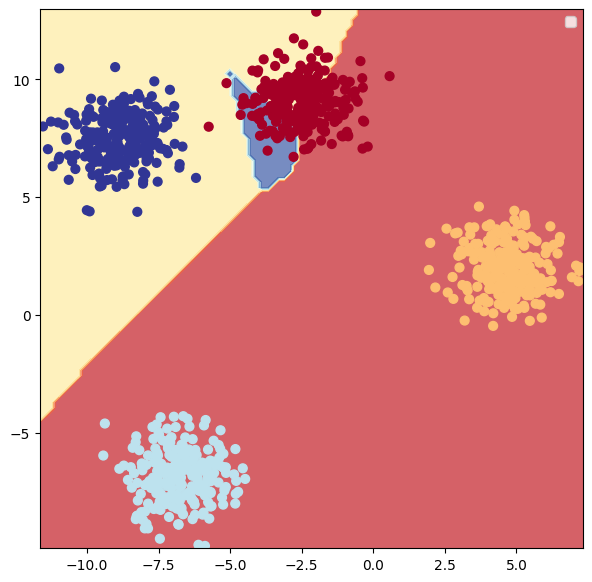

In [ ]:
classifier.eval()
with torch.inference_mode():
  y_pred = classifier(X)

plot_classifier(X, y)

## Define Loss and optimizer

In [ ]:
loss = nn.CrossEntropyLoss()

optimizer = optim.Adam(params = classifier.parameters(), lr = 0.01)

def accuracy(y_true, y_pred):
  return torch.eq(y_true, y_pred).sum().item()*100/len(y_pred)

## Defining Pytorch Workflow

In [ ]:
EPOCH = 100

for index in range(EPOCH):
  classifier.train()

  train_pred_logits = classifier(X_train).squeeze()
  train_pred =  train_pred_logits.softmax(dim = 1).argmax(dim=1)

  #calculate success/fail metrics
  train_loss = loss(train_pred_logits, y_train)
  train_accuracy = accuracy(y_train, train_pred)

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  classifier.eval()
  with torch.inference_mode():
    test_pred_logits = classifier(X_test).squeeze()
    test_pred = test_pred_logits.softmax(dim = 1).argmax(dim = 1)

    #calculate success/fail metrics
    test_loss = loss(test_pred_logits, y_test)
    test_accuracy = accuracy(y_test, test_pred)

  if index % 10 == 0 :
    print(f"Epoch: {index} Train Loss: {train_loss} Train Accuracy: {train_accuracy} Test Loss: {test_loss} Test Accuracy: {test_accuracy}")

Epoch: 0 Train Loss: 0.4337020218372345 Train Accuracy: 99.46666666666667 Test Loss: 0.4082973301410675 Test Accuracy: 100.0
Epoch: 10 Train Loss: 0.23234528303146362 Train Accuracy: 99.73333333333333 Test Loss: 0.21092818677425385 Test Accuracy: 100.0
Epoch: 20 Train Loss: 0.05315340682864189 Train Accuracy: 99.86666666666666 Test Loss: 0.040778663009405136 Test Accuracy: 100.0
Epoch: 30 Train Loss: 0.011149733327329159 Train Accuracy: 99.86666666666666 Test Loss: 0.007824709638953209 Test Accuracy: 100.0
Epoch: 40 Train Loss: 0.006733960006386042 Train Accuracy: 99.86666666666666 Test Loss: 0.004331332631409168 Test Accuracy: 100.0
Epoch: 50 Train Loss: 0.005193722900003195 Train Accuracy: 99.86666666666666 Test Loss: 0.0030231152195483446 Test Accuracy: 100.0
Epoch: 60 Train Loss: 0.004196058493107557 Train Accuracy: 99.86666666666666 Test Loss: 0.002470094244927168 Test Accuracy: 100.0
Epoch: 70 Train Loss: 0.003595291404053569 Train Accuracy: 99.86666666666666 Test Loss: 0.0020004

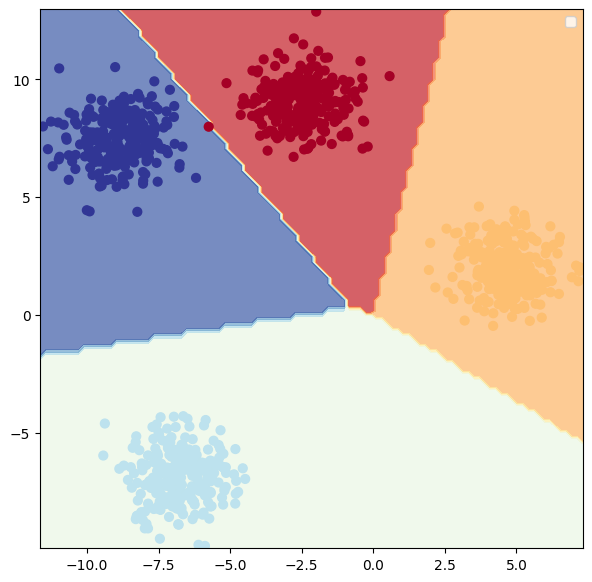

In [ ]:
# Plot the trained models
plot_classifier(X, y)

In [ ]:
MODEL_FOLDER_PATH = Path('models')
MODEL_FOLDER_PATH.mkdir(parents=True, exist_ok=True)

MODEL_FILE_PATH = Path("Practice_Model_Non_Linear_MultiClass_Classification.pth")
MODEL_SAVE_PATH = MODEL_FOLDER_PATH / MODEL_FILE_PATH


torch.save(classifier.state_dict(), f = MODEL_SAVE_PATH)